In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import datetime
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import matplotlib as mpl
import missingno as missingno
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [119]:
bankData= pd.read_csv('bank-additional-full.csv')
bankData.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Checking Null values in the feature

In [120]:
bankData.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Plotting outliers of Age

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba31dd4340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba31dd48e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba31dd4070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba31dd4e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba31c13190>],
 'means': []}

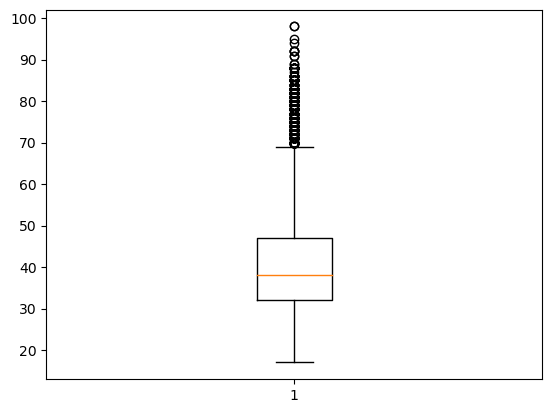

In [121]:
plt.boxplot(bankData['age'])

#### Removing Outliers of Age through quartile ranges

In [122]:
Q1Age= bankData['age'].quantile(0.25)

Q3Age= bankData['age'].quantile(0.75)
IQRAge= Q3Age-Q1Age
upperLimitAge=Q3Age+1.5*IQRAge
lowerLimitAge=Q1Age-1.5*IQRAge

filteredByAgeLimit = bankData['age'][bankData["age"] < upperLimitAge]
bankData['age']= filteredByAgeLimit
bankData=bankData.dropna()
bankData['age']=bankData['age'].astype(int)

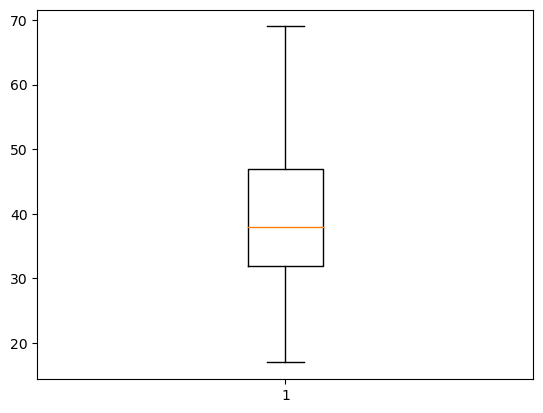

In [123]:
plt.boxplot(bankData['age'])
plt.show()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.003701  0.015121  0.004488 -0.020445   
duration       -0.003701  1.000000 -0.071676 -0.047103  0.018825   
campaign        0.015121 -0.071676  1.000000  0.051243 -0.078482   
pdays           0.004488 -0.047103  0.051243  1.000000 -0.581228   
previous       -0.020445  0.018825 -0.078482 -0.581228  1.000000   
emp.var.rate    0.069054 -0.027587  0.148859  0.268187 -0.422639   
cons.price.idx  0.035766  0.004684  0.126763  0.079729 -0.210886   
cons.conf.idx   0.104528 -0.009966 -0.010400 -0.084935 -0.062803   
euribor3m       0.081997 -0.032175  0.133190  0.293087 -0.454645   
nr.employed     0.065929 

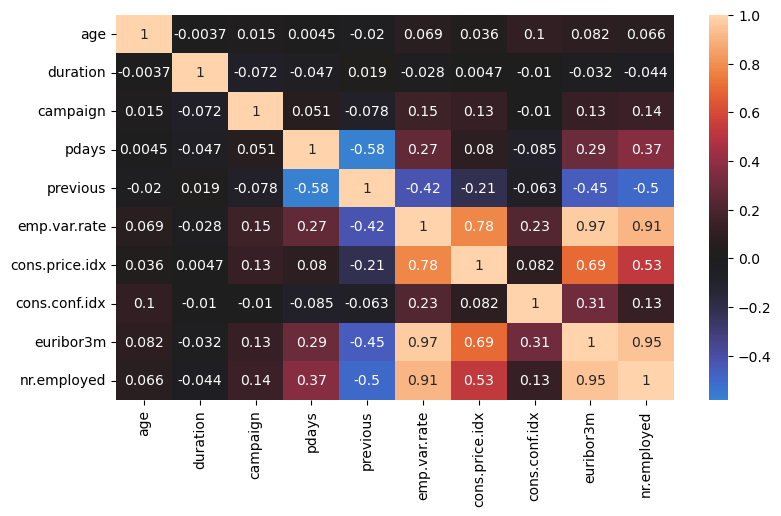

In [124]:
print(bankData.columns)
corrBankData= bankData.corr()
print(corrBankData)

plt.figure(figsize=(9,5))  
sns.heatmap(corrBankData,annot=True, center=0)
plt.show() 


In [125]:
ageGroup=[]

for age in bankData['age']:
    if age<25:
        ageGroup.append('Young')
    if age>=25 or age <60:
        ageGroup.append('Adult')
    if age>=60:
        ageGroup.append('Elderly')

dfAgeGroup= pd.DataFrame(ageGroup)
print(min(bankData['age']))
bankData['AgeGroup']= dfAgeGroup
bankData['AgeGroup'].unique()
print(bankData['AgeGroup'].value_counts())
bankData= bankData.drop('age',axis=1)

17
Adult      39189
Young        947
Elderly      583
Name: AgeGroup, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

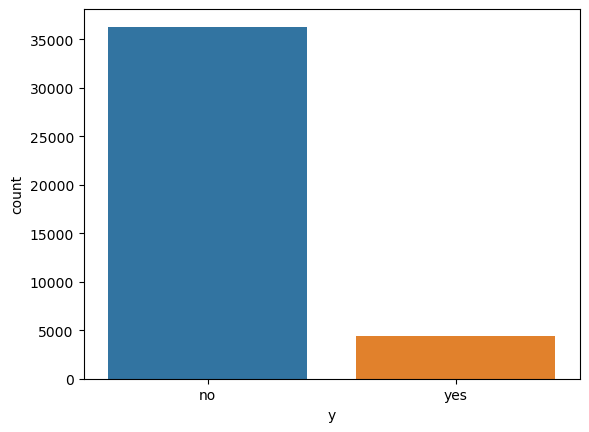

In [126]:
sns.countplot(x=bankData['y'])

In [138]:
bankData.y.value_counts()

no     36300
yes     4419
Name: y, dtype: int64

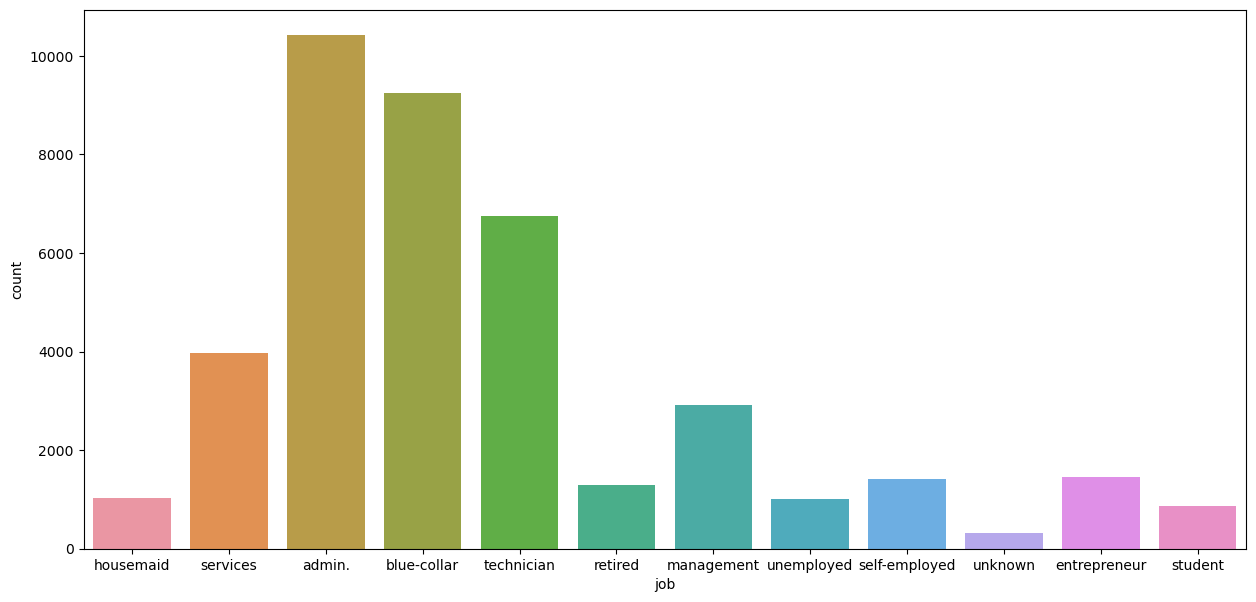

In [127]:
plt.figure(figsize=(15,7))
sns.countplot(x=bankData['job'])
plt.show()

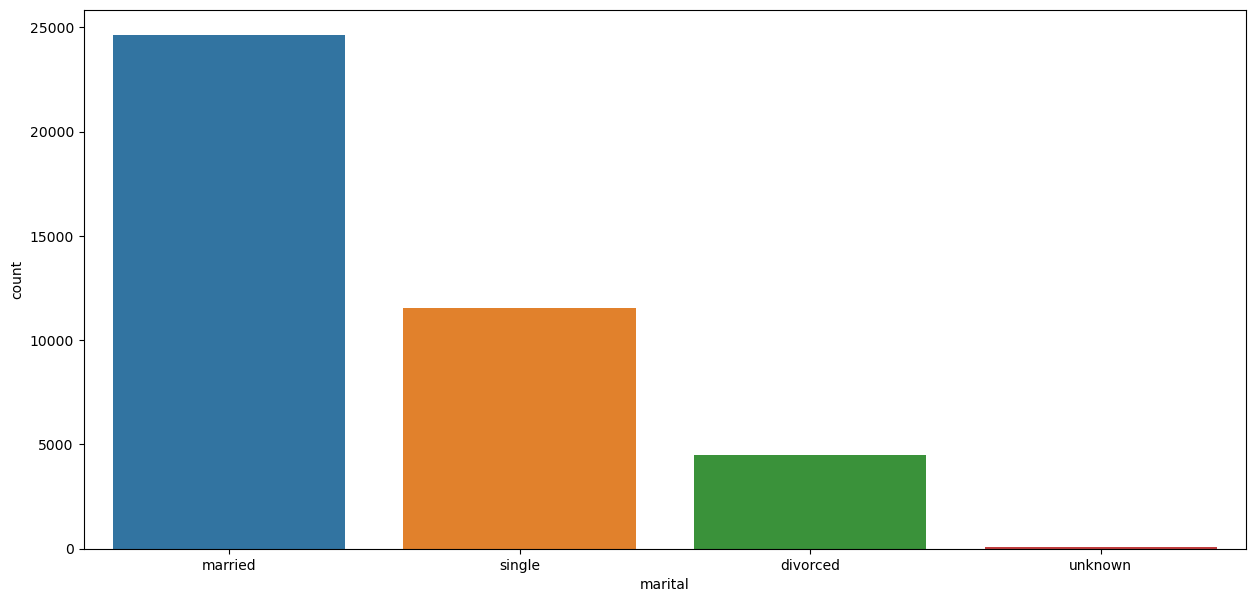

In [128]:
plt.figure(figsize=(15,7))
sns.countplot(x=bankData['marital'])
plt.show()

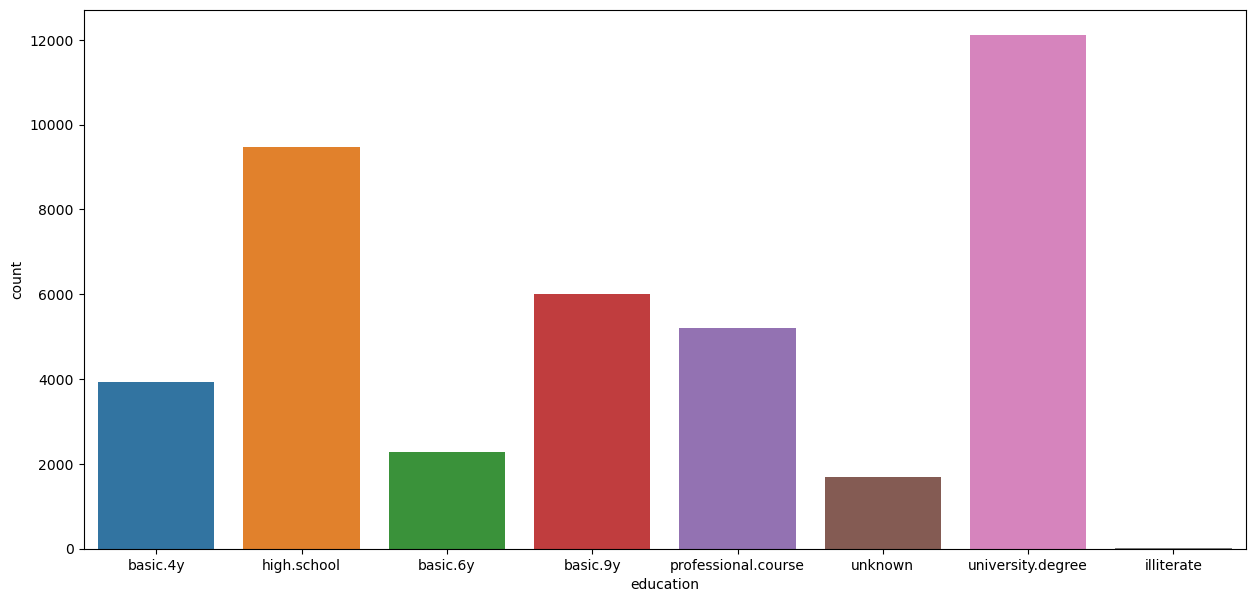

In [129]:
plt.figure(figsize=(15,7))
sns.countplot(x=bankData['education'])
plt.show()

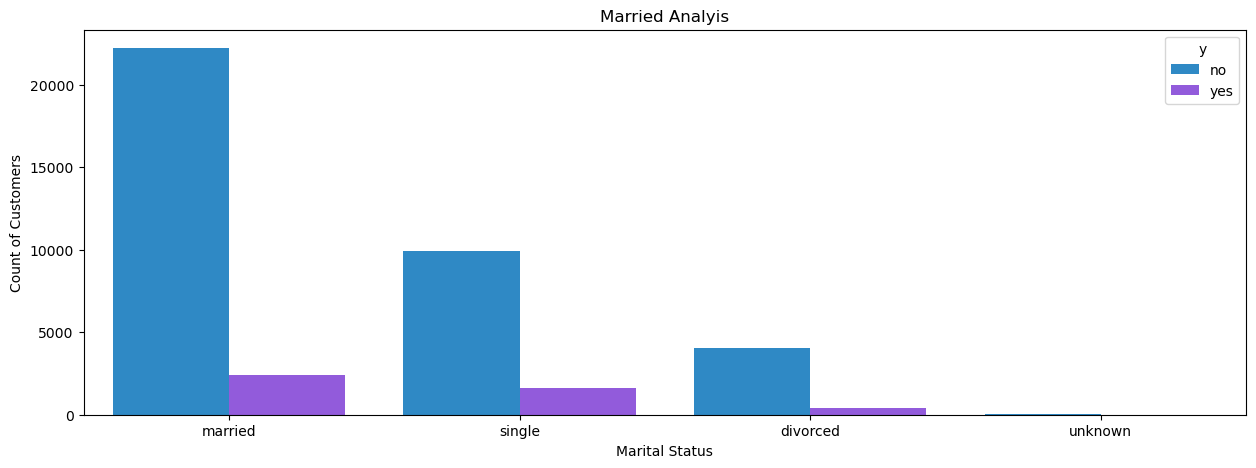

In [144]:
plt.figure(figsize=(15,5))
plotMaried = sns.countplot(x=bankData["marital"],hue=bankData["y"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'], order= bankData['marital'].value_counts().index)
plotMaried.set_title("Married Analyis")
plotMaried.set_xlabel("Marital Status")
plotMaried.set_ylabel("Count of Customers")


plt.show()

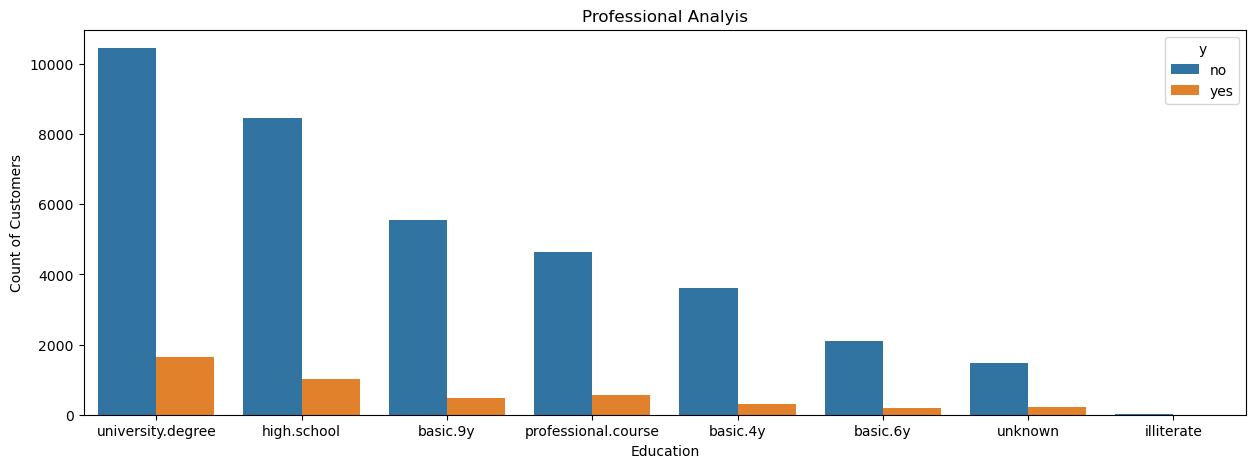

In [145]:
plt.figure(figsize=(15,5))
plotProf = sns.countplot(x=bankData["education"],hue=bankData["y"], order= bankData['education'].value_counts().index)
plotProf.set_title("Professional Analyis")
plotProf.set_xlabel("Education")
plotProf.set_ylabel("Count of Customers")


plt.show()

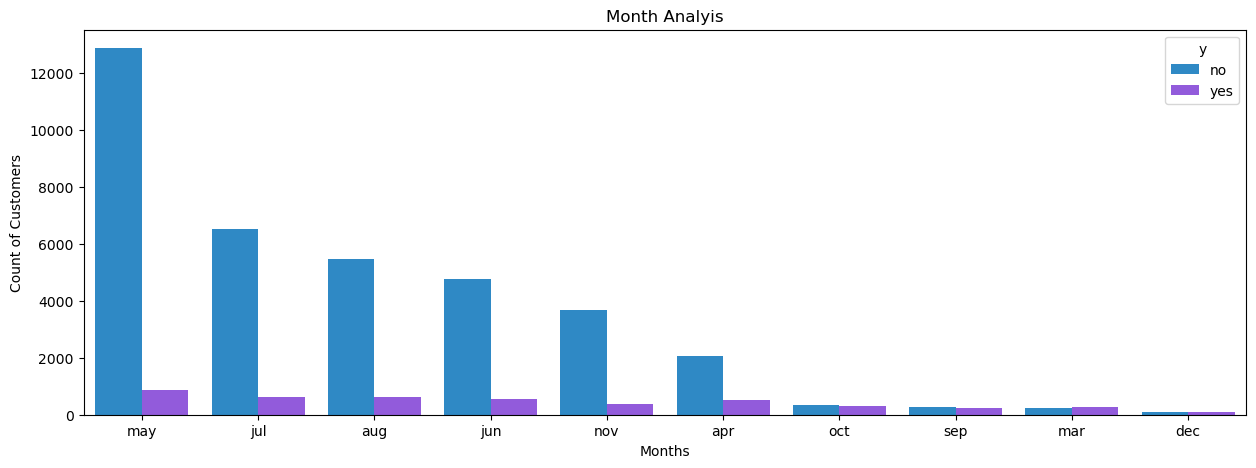

In [147]:
plt.figure(figsize=(15,5))
plotmon = sns.countplot(x=bankData["month"],hue=bankData["y"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'], order= bankData['month'].value_counts().index)
plotmon.set_title("Month Analyis")
plotmon.set_xlabel("Months")
plotmon.set_ylabel("Count of Customers")
plt.show()

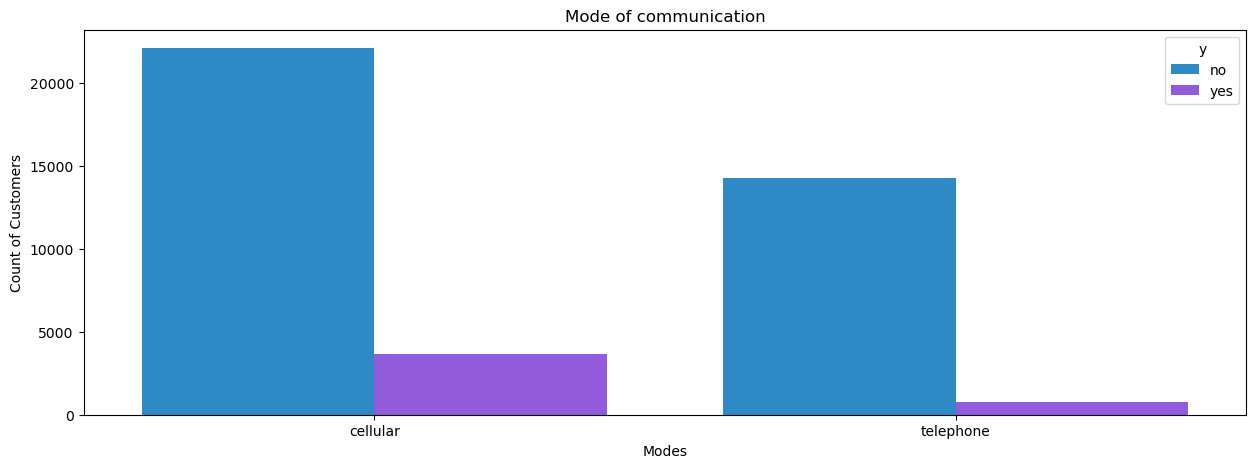

In [149]:
plt.figure(figsize=(15,5))
plotCell = sns.countplot(x=bankData["contact"],hue=bankData["y"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'], order= bankData['contact'].value_counts().index)
plotCell.set_title("Mode of communication")
plotCell.set_xlabel("Modes")
plotCell.set_ylabel("Count of Customers")


plt.show()

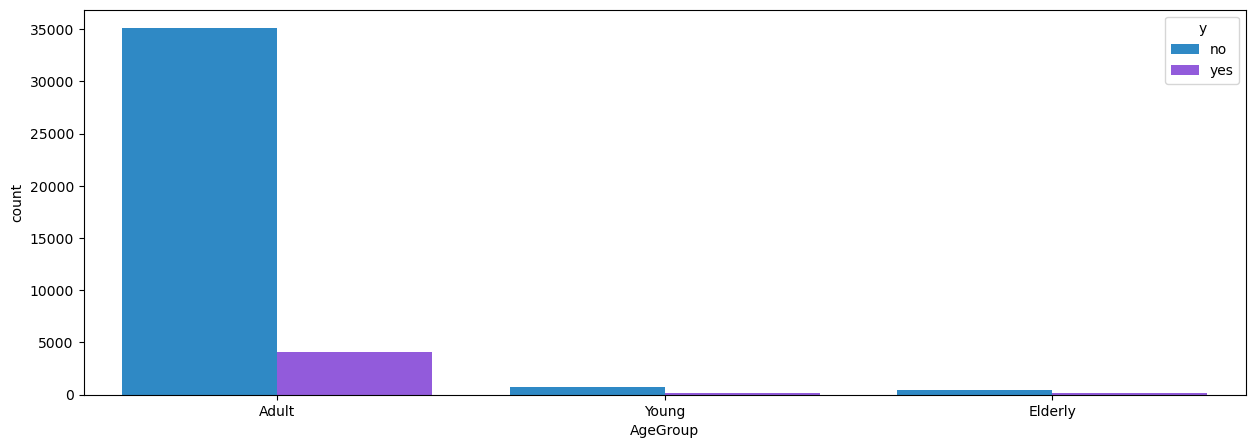

In [140]:
plt.figure(figsize=(15,5))
plotChurned = sns.countplot(x=bankData["AgeGroup"],hue=bankData["y"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'], order= bankData['AgeGroup'].value_counts().index)


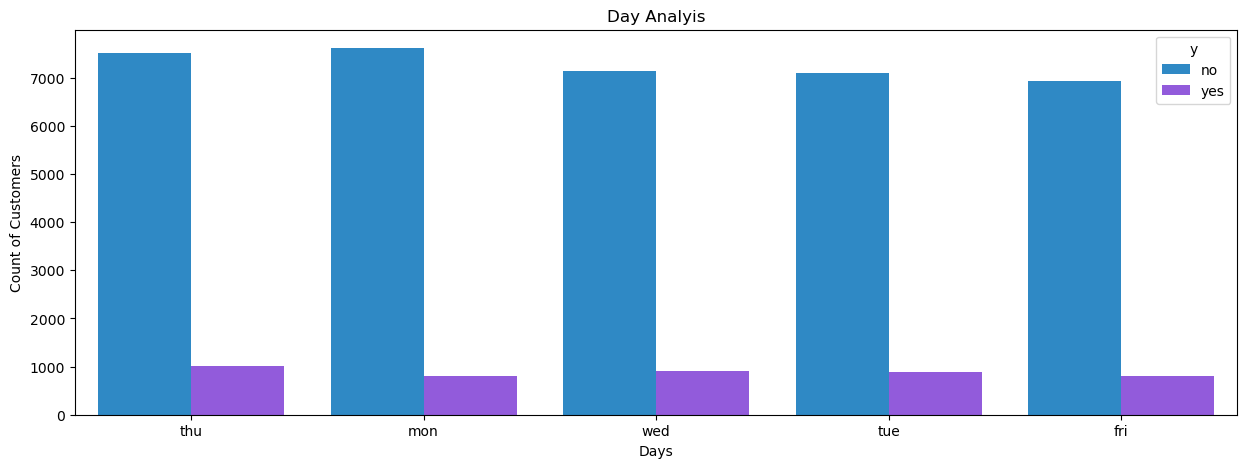

In [151]:
plt.figure(figsize=(15,5))
plotday = sns.countplot(x=bankData["day_of_week"],hue=bankData["y"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'], order= bankData['day_of_week'].value_counts().index)
plotday.set_title("Day Analyis")
plotday.set_xlabel("Days")
plotday.set_ylabel("Count of Customers")


plt.show()

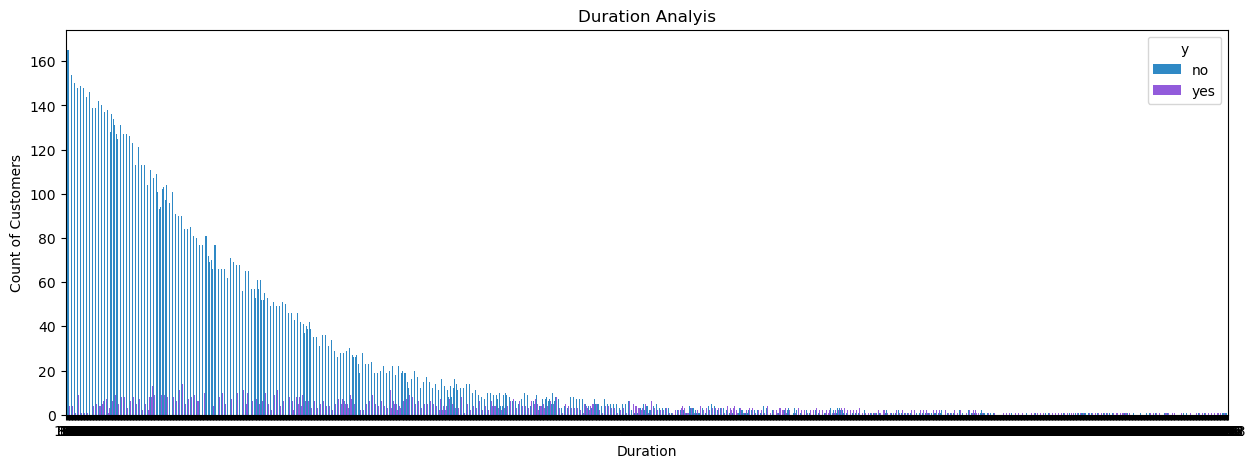

In [152]:
plt.figure(figsize=(15,5))
plotdur = sns.countplot(x=bankData["duration"],hue=bankData["y"], palette= ['#168ede','#8f46f0','#d989aa','#d5ed87'], order= bankData['duration'].value_counts().index)
plotdur.set_title("Duration Analyis")
plotdur.set_xlabel("Duration")
plotdur.set_ylabel("Count of Customers")


plt.show()

In [98]:


bankData['contact'].value_counts()

cellular     25724
telephone    14995
Name: contact, dtype: int64

In [99]:
bankData['y'].value_counts()

no     36300
yes     4419
Name: y, dtype: int64

#### Encoding through Label Encoder and one hot encoding using get_dummies

In [100]:
labelEncoderBankData = LabelEncoder()
# bankData['job']      = labelEncoderBankData.fit_transform(bankData['job']) 
# bankData['marital']  = labelEncoderBankData.fit_transform(bankData['marital']) 
# bankData['education']= labelEncoderBankData.fit_transform(bankData['education']) 


# bankData.head(10)


bankData['loan']=bankData['loan'].replace({'unknown':'unknown_loan'})

bankData['education']=bankData['education'].replace({'unknown':'unknown_education'})
bankData['marital']=bankData['marital'].replace({'unknown':'unknown_marital'})
bankData['job']=bankData['job'].replace({'unknown':'unknown_job'})


jobCol = pd.get_dummies(bankData['job'], drop_first=False)
bankData= bankData.join(jobCol)
bankData= bankData.drop('job', axis=1)


maritalCol = pd.get_dummies(bankData['marital'], drop_first=False)
bankData= bankData.join(maritalCol)
bankData= bankData.drop('marital', axis=1)

educationCol = pd.get_dummies(bankData['education'], drop_first=False)
bankData= bankData.join(educationCol)
bankData= bankData.drop('education', axis=1)


contactCol = pd.get_dummies(bankData['contact'], drop_first=False)
bankData= bankData.join(contactCol)
bankData= bankData.drop('contact', axis=1)
                        
ageGroupCol = pd.get_dummies(bankData['AgeGroup'], drop_first=False)
bankData= bankData.join(ageGroupCol)
bankData= bankData.drop('AgeGroup', axis=1)
bankData['default']  = labelEncoderBankData.fit_transform(bankData['default']) 
bankData['housing']  = labelEncoderBankData.fit_transform(bankData['housing']) 
bankData['loan']     = labelEncoderBankData.fit_transform(bankData['loan']) 




In [101]:
bankData.columns

Index(['default', 'housing', 'loan', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown_job', 'divorced', 'married', 'single',
       'unknown_marital', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
       'illiterate', 'professional.course', 'university.degree',
       'unknown_education', 'cellular', 'telephone', 'Adult', 'Elderly',
       'Young'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba33a96310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba32a04cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba784b6e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba32a043d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba32a04fa0>],
 'means': []}

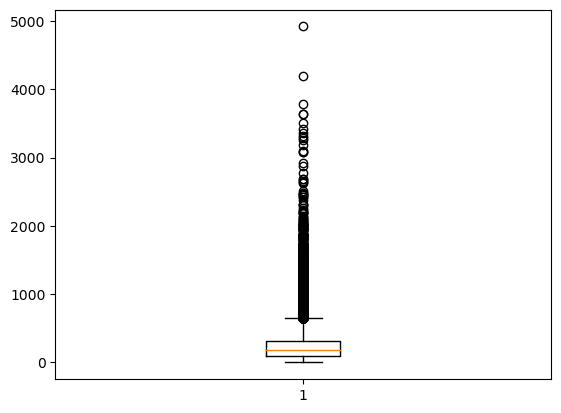

In [102]:
plt.boxplot(bankData['duration'])


#### Duration of call should be greater than 0

In [103]:
durationZero=bankData['duration'][bankData['duration']>0]
bankData['duration']= durationZero

In [104]:
Q1Duration= bankData['duration'].quantile(0.25)

Q3Duration= bankData['duration'].quantile(0.75)
IQRDuration= Q3Duration-Q1Duration
upperLimitDuration=Q3Duration+1.5*IQRDuration
lowerLimitDuration=Q1Duration-1.5*IQRDuration


filteredByDurationLimit = bankData['duration'][bankData["duration"] < upperLimitDuration]
bankData['duration']= filteredByDurationLimit
bankData=bankData.dropna()
bankData['duration']=bankData['duration'].astype(int)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba3222b940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba3aa30580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba3222b730>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba3aa30af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba3aa30b50>],
 'means': []}

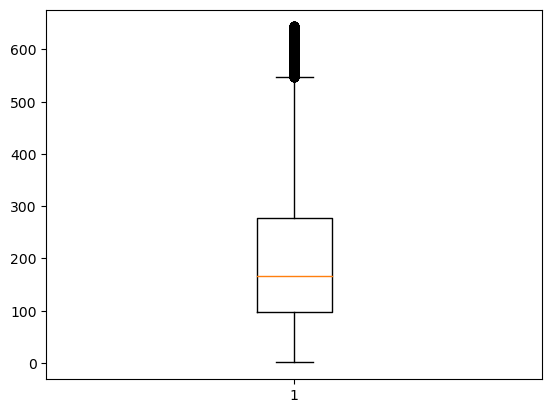

In [105]:
plt.boxplot(bankData['duration'])

In [107]:
monthCol = pd.get_dummies(bankData['month'], drop_first=False)
bankData= bankData.join(monthCol)
bankData= bankData.drop('month', axis=1)

dayCol = pd.get_dummies(bankData['day_of_week'], drop_first=False)
bankData= bankData.join(dayCol)
bankData= bankData.drop('day_of_week', axis=1)

bankData['poutcome']= labelEncoderBankData.fit_transform(bankData['poutcome']) 
bankData['y']= labelEncoderBankData.fit_transform(bankData['y'])
bankData.head(10)

,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,mar,may,nov,oct,sep,fri,mon,thu,tue,wed
0,0,0,0,261,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,149,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
2,0,2,0,226,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,151,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
4,0,0,2,307,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
5,1,0,0,198,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
6,0,0,0,139,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
7,1,0,0,217,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
8,0,2,0,380,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
9,0,2,0,50,1,999,0,1,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0


0    34867
1     2913
Name: y, dtype: int64
0    2913
1    2913
Name: y, dtype: int64


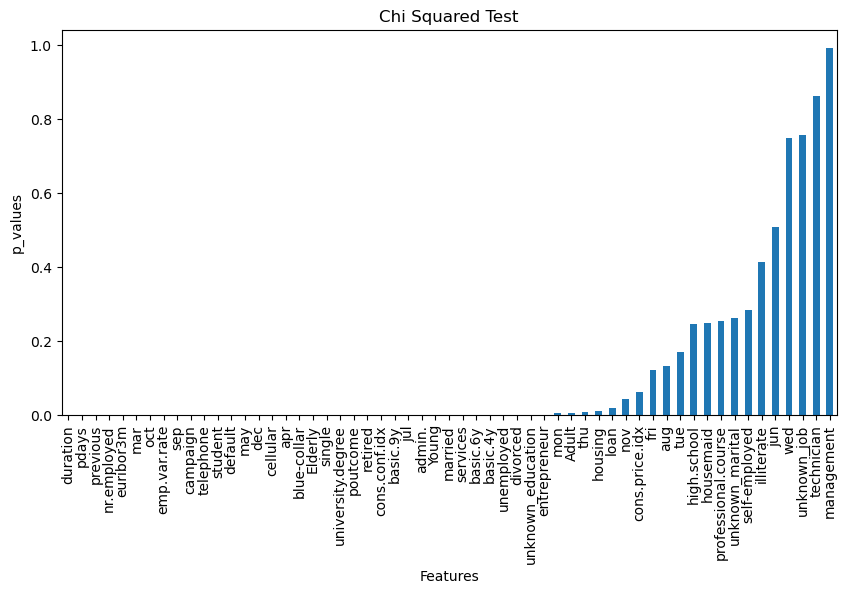

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y= bankData['y']
X= bankData.drop('y',axis=1)

print(y.value_counts())

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_Rus, y_Rus = rus.fit_resample(X, y)

print(y_Rus.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_Rus, y_Rus, test_size = 0.30, random_state = 101)


  #Target variable
f_score=chi2(abs(X),y)   #returns f score and p value 

p_value=pd.Series(f_score[1],index=X.columns)
p_value.sort_values(ascending=True,inplace=True)
discardList=[]

for key,val in p_value.iteritems():
    if val >= 0.05:
        discardList.append(key)
plt.figure(figsize=(10,5))
p_value.plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("p_values")
plt.title("Chi Squared Test")
plt.show()


In [59]:
bankData=bankData.drop(['cons.price.idx', 'fri', 'aug', 'tue', 'high.school', 'housemaid', 'professional.course', 'unknown_marital', 'self-employed', 'illiterate', 'jun', 'wed', 'unknown_job', 'technician', 'management'],axis=1)

#### Saving CSV for Training Models  

In [60]:
bankData.to_csv(r'Documents\OneDrive\Documents\City University of London\Term1\Machine Learning\CousrseWorkML\BankMarketingForModelTraining.csv')